In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
iris = load_iris()
X = pd.DataFrame(iris.data, columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width']) # Name columns according to data set
X.corr(method = "pearson")
# This will display a 4 x 4 DataFrame displaying the correlations between the row and column variable. What values of
# the correlation coefficients will be along the main diagonal?

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.117570,0.871754,0.817941
Sepal Width,-0.117570,1.000000,-0.428440,-0.366126
Petal Length,0.871754,-0.428440,1.000000,0.962865
Petal Width,0.817941,-0.366126,0.962865,1.000000


In [4]:
corr_feature = ['Petal Length','Petal Width']
target = X['Sepal Length']

feature_train, feature_test, target_train, target_test = train_test_split(X[corr_feature[:1]],target,test_size = 0.2, random_state=42) # only look at Petal Length
corr_feature_train, corr_feature_test, corr_target_train, corr_target_test = train_test_split(X[corr_feature],target,test_size = 0.2, random_state=42) # look at both Petal Length and Width

In [5]:
from sklearn.linear_model import LinearRegression

# Instantiate
uncorr_model = LinearRegression()
corr_model = LinearRegression()

uncorr_model.fit(feature_train, target_train)
corr_model.fit(corr_feature_train, corr_target_train)

LinearRegression()

In [6]:
print('Uncorrelated training score: ', uncorr_model.score(feature_train, target_train))
print('Uncorrelated testing score: ', uncorr_model.score(feature_test, target_test))

Uncorrelated training score:  0.7433457054705969
Uncorrelated testing score:  0.812980761507489


In [7]:
print('Correlated training score: ', corr_model.score(corr_feature_train, corr_target_train))
print('Correlated testing score: ', corr_model.score(corr_feature_test, corr_target_test))

Correlated training score:  0.7543504893573446
Correlated testing score:  0.7972490195696222


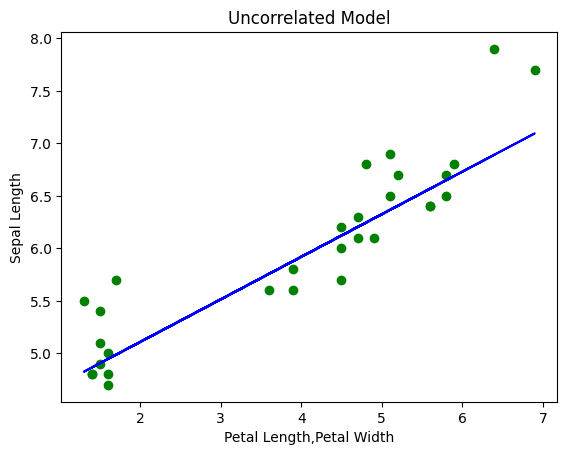

In [8]:
#plt.scatter(feature_train, target_train,color='g') 
plt.scatter(feature_test, target_test,color='g') 
plt.plot(feature_test, uncorr_model.predict(feature_test),color='b') 
plt.title("Uncorrelated Model")
plt.xlabel("Petal Length,Petal Width")
plt.ylabel("Sepal Length")
plt.show()
